In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [135]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A20E-6E0F

 Directory of C:\Users\Naku\Desktop\books\zindi hackerthon\umojahack-africa-2022-intermediate-challenge

03/20/2022  02:12 AM    <DIR>          .
03/20/2022  02:12 AM    <DIR>          ..
03/19/2022  04:40 AM    <DIR>          .ipynb_checkpoints
03/20/2022  02:11 AM            76,378 Baseline.csv
03/20/2022  02:12 AM           171,384 challenge 2.ipynb
03/18/2022  07:04 AM               793 DataDictionary.csv
03/19/2022  12:45 PM           114,458 pee.ipynb
03/18/2022  07:04 AM         4,069,463 policies.csv
03/18/2022  07:04 AM            72,358 SampleSubmission.csv
03/18/2022  07:04 AM           534,268 test.csv
03/18/2022  07:04 AM         1,312,345 train.csv
03/19/2022  04:40 AM           230,003 Zimnat_starternotebook.ipynb
               9 File(s)      6,581,450 bytes
               3 Dir(s)  270,284,079,104 bytes free


In [136]:
#loading data
dataInfo = pd.read_csv('DataDictionary.csv')
policy = pd.read_csv('policies.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [137]:
#viewing the data
dataInfo.head()

,Policy Data,Unnamed: 1
0,Columns,Data type
1,policy number,Unique policy identifier
2,product code,product code
3,trans date,date of policy transaction
4,from date,first date of policy cover


In [138]:
policy.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [139]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30371 entries, 0 to 30370
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   policy_number      30371 non-null  object
 1   product_code       30371 non-null  object
 2   trans_date         30371 non-null  object
 3   from_date          30371 non-null  object
 4   to_date            30371 non-null  object
 5   agent              30371 non-null  object
 6   class_of_business  30325 non-null  object
 7   client_type        30371 non-null  object
 8   renewal_frequency  30371 non-null  object
 9   branch             30371 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


In [140]:
# Convert datetime variables to datetime objects
policy.from_date = pd.to_datetime(policy.from_date, errors='coerce')
policy.trans_date = pd.to_datetime(policy.trans_date, errors='coerce')


# Confirm that the dates have been converted successfully 
policy.from_date.describe()

count                   30371
unique                   1431
top       2018-02-01 00:00:00
freq                     1122
first     2017-01-01 00:00:00
last      2021-11-17 00:00:00
Name: from_date, dtype: object

In [142]:
# Extract day, month and year from the loss date column
# day
policy['trans_date_day'] =policy.trans_date.dt.month

# month
policy['trans_date_month'] = policy.trans_date.dt.month
 
# year
policy['trans_date_year'] = policy.trans_date.dt.year
# day
policy['from_date_day'] =policy.from_date.dt.day

# month
policy['from_date_month'] = policy.from_date.dt.month
 
# year
policy['from_date_year'] = policy.from_date.dt.year

# Preview engineered date features
#train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()# Extract day, month and year from the loss date column
# day
#train['loss_date_day'] = train.loss_date.dt.day

# month
#train['loss_date_month'] = train.loss_date.dt.month
 
# year
#train['loss_date_year'] = train.loss_date.dt.year

# Preview engineered date features
#train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()

In [143]:
policy

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch,trans_date_day,trans_date_month,trans_date_year,from_date_day,from_date_month,from_date_year
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002,7,7,2017,1,7,2017
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006,7,7,2017,3,7,2017
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006,7,7,2017,3,7,2017
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002,7,7,2017,1,7,2017
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002,7,7,2017,1,7,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30366,pol000005856,prod00015,2021-11-01 13:03:44.110,2021-11-01,2022-02-28 00:00:00.000,ag00006,cob00034,ct0001,rf0001,br00002,11,11,2021,1,11,2021
30367,pol000009519,prod00027,2021-11-01 14:33:18.620,2021-10-01,2022-09-30 00:00:00.000,ag00066,cob00031,ct0003,rf0002,br00001,11,11,2021,1,10,2021
30368,pol000007723,prod00015,2021-11-01 15:12:18.000,2021-11-01,2021-11-30 00:00:00.000,ag00021,cob00034,ct0001,rf0005,br00001,11,11,2021,1,11,2021
30369,pol000006085,prod00015,2021-11-01 15:54:55.943,2021-10-01,2021-10-31 00:00:00.000,ag00004,cob00034,ct0001,rf0005,br00002,11,11,2021,1,10,2021


In [144]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30371 entries, 0 to 30370
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   policy_number      30371 non-null  object        
 1   product_code       30371 non-null  object        
 2   trans_date         30371 non-null  datetime64[ns]
 3   from_date          30371 non-null  datetime64[ns]
 4   to_date            30371 non-null  object        
 5   agent              30371 non-null  object        
 6   class_of_business  30325 non-null  object        
 7   client_type        30371 non-null  object        
 8   renewal_frequency  30371 non-null  object        
 9   branch             30371 non-null  object        
 10  trans_date_day     30371 non-null  int64         
 11  trans_date_month   30371 non-null  int64         
 12  trans_date_year    30371 non-null  int64         
 13  from_date_day      30371 non-null  int64         
 14  from_d

In [145]:
# Convert categorical variables to categorical objects
cat_cols = policy.columns.difference(['from_date_year', 'from_date_month', 'from_date_day','trans_date_year','trans_date_month','trans_date_day',' trans_date',' from_date']).tolist()

# Preview categorical variables
policy[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30371 entries, 0 to 30370
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   agent              30371 non-null  object        
 1   branch             30371 non-null  object        
 2   class_of_business  30325 non-null  object        
 3   client_type        30371 non-null  object        
 4   from_date          30371 non-null  datetime64[ns]
 5   policy_number      30371 non-null  object        
 6   product_code       30371 non-null  object        
 7   renewal_frequency  30371 non-null  object        
 8   to_date            30371 non-null  object        
 9   trans_date         30371 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(8)
memory usage: 1.4+ MB


In [146]:
policy[cat_cols] = policy[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [147]:
for col in cat_cols:
  policy[col] = train[col].astype('category')

# Confirm
policy.info()

KeyError: 'from_date'

In [ ]:
policy[cat_cols] = policy[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
policy.info()

In [ ]:
train = pd.merge(policy,train)

In [ ]:
train

In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           9376 non-null   object 
 1   policy_number      9290 non-null   object 
 2   claim_number       9376 non-null   object 
 3   sum_insured        9376 non-null   float64
 4   product            9376 non-null   object 
 5   agent              9376 non-null   object 
 6   class_of_business  9376 non-null   object 
 7   risk_type          9376 non-null   object 
 8   loss_date          9376 non-null   object 
 9   client_type        9376 non-null   object 
 10  renewal_frequency  9376 non-null   object 
 11  primary_cause      9376 non-null   object 
 12  secondary_cause    9376 non-null   object 
 13  branch             9376 non-null   object 
 14  target             9376 non-null   float64
dtypes: float64(2), object(13)
memory usage: 622.7+ KB


FOCUSSING ON THE TRAIN DATA--VISUALISATION AND ANALYSIS

In [149]:
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           9376 non-null   object 
 1   policy_number      9290 non-null   object 
 2   claim_number       9376 non-null   object 
 3   sum_insured        9376 non-null   float64
 4   product            9376 non-null   object 
 5   agent              9376 non-null   object 
 6   class_of_business  9376 non-null   object 
 7   risk_type          9376 non-null   object 
 8   loss_date          9376 non-null   object 
 9   client_type        9376 non-null   object 
 10  renewal_frequency  9376 non-null   object 
 11  primary_cause      9376 non-null   object 
 12  secondary_cause    9376 non-null   object 
 13  branch             9376 non-null   object 
 14  target             9376 non-null   float64
dtypes: float64(2), object(13)
memory usage: 622.7+ KB


In [151]:
train.isnull().sum()

claim_id              0
policy_number        86
claim_number          0
sum_insured           0
product               0
agent                 0
class_of_business     0
risk_type             0
loss_date             0
client_type           0
renewal_frequency     0
primary_cause         0
secondary_cause       0
branch                0
target                0
dtype: int64

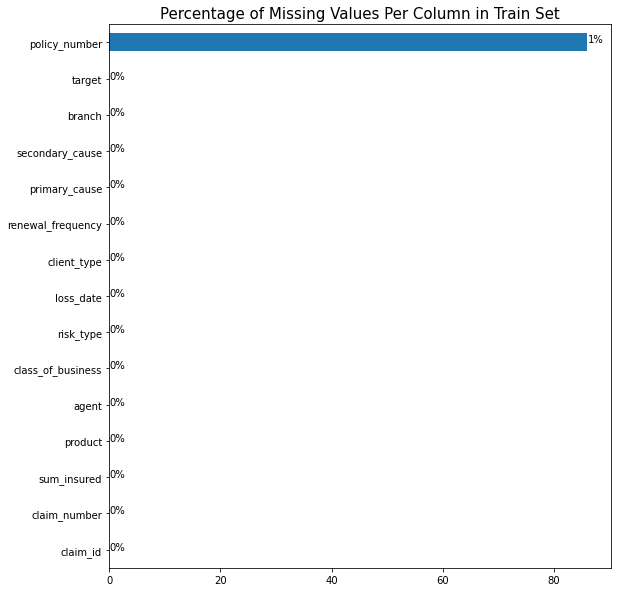

In [152]:
# Plot missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [153]:
#checking for duplications
train.duplicated().sum()

0

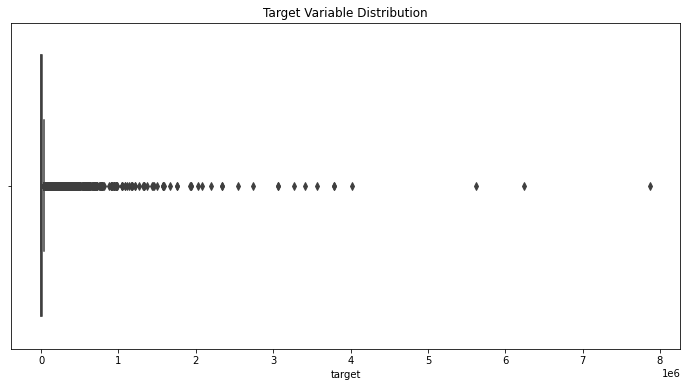

In [154]:
# A box plot showing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(train.target)
plt.title('Target Variable Distribution');

In [155]:
# Convert datetime variables to datetime objects
train.loss_date = pd.to_datetime(train.loss_date, errors='coerce')

# Confirm that the dates have been converted successfully 
train.loss_date.describe()

count                    9376
unique                   1359
top       2019-08-20 00:00:00
freq                       83
first     2018-01-01 00:00:00
last      2021-10-22 00:00:00
Name: loss_date, dtype: object

In [156]:
# Convert categorical variables to categorical objects
cat_cols = train.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).tolist()

# Preview categorical variables
train[cat_cols].head()

,agent,branch,claim_number,class_of_business,client_type,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause
0,ag00068,br00006,claim0011359,cob00031,ct0003,pol000009680,pc0007,prod00027,rf0001,rt00006,sc00022
1,ag00226,br00002,claim0005272,cob00010,ct0003,pol000006869,pc0007,prod00005,rf0001,rt00032,sc00023
2,ag00037,br00002,claim0004147,cob00010,ct0003,pol000006135,pc0007,prod00029,rf0001,rt00026,sc00024
3,ag00037,br00001,claim0009962,cob00009,ct0003,pol000008991,pc0007,prod00005,rf0001,rt00032,sc00021
4,ag00226,br00001,claim0007346,cob00034,ct0001,pol000007768,pc0007,prod00015,rf0001,rt00023,sc00021


In [157]:
# Fill in missing values in categorical variables with the most common
train[cat_cols] = train[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  train[col] = train[col].astype('category')

# Confirm
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           9376 non-null   object        
 1   policy_number      9376 non-null   category      
 2   claim_number       9376 non-null   category      
 3   sum_insured        9376 non-null   float64       
 4   product            9376 non-null   category      
 5   agent              9376 non-null   category      
 6   class_of_business  9376 non-null   category      
 7   risk_type          9376 non-null   category      
 8   loss_date          9376 non-null   datetime64[ns]
 9   client_type        9376 non-null   category      
 10  renewal_frequency  9376 non-null   category      
 11  primary_cause      9376 non-null   category      
 12  secondary_cause    9376 non-null   category      
 13  branch             9376 non-null   category      
 14  target  

In [158]:
train

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371,ID_A5ETUPPQDFLS,pol000006054,claim0003743,42000.0,prod00015,ag00037,cob00034,rt00023,2019-09-02,ct0001,rf0002,pc0007,sc00021,br00002,205.68
9372,ID_Z3OGUWI7T2GC,pol000006715,claim0005088,6800.0,prod00005,ag00064,cob00009,rt00032,2018-05-12,ct0003,rf0002,pc0007,sc00021,br00002,1133.32
9373,ID_GSJDAJCABSBZ,pol000008236,claim0008976,5000.0,prod00005,ag00064,cob00009,rt00032,2018-07-28,ct0003,rf0001,pc0007,sc00029,br00001,2176.00
9374,ID_8B7YNBEKXHJW,pol000006847,claim0005250,6000.0,prod00005,ag00037,cob00009,rt00032,2018-08-16,ct0003,rf0001,pc0007,sc00022,br00002,851.40


In [159]:
# Extract day, month and year from the loss date column
# day
train['loss_date_day'] = train.loss_date.dt.day

# month
train['loss_date_month'] = train.loss_date.dt.month
 
# year
train['loss_date_year'] = train.loss_date.dt.year

# Preview engineered date features
train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()# Extract day, month and year from the loss date column
# day
train['loss_date_day'] = train.loss_date.dt.day

# month
train['loss_date_month'] = train.loss_date.dt.month
 
# year
train['loss_date_year'] = train.loss_date.dt.year

# Preview engineered date features
train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()

,loss_date,loss_date_day,loss_date_month,loss_date_year
0,2021-05-13,13,5,2021
1,2018-05-13,13,5,2018
2,2018-08-18,18,8,2018
3,2018-12-20,20,12,2018
4,2018-11-07,7,11,2018


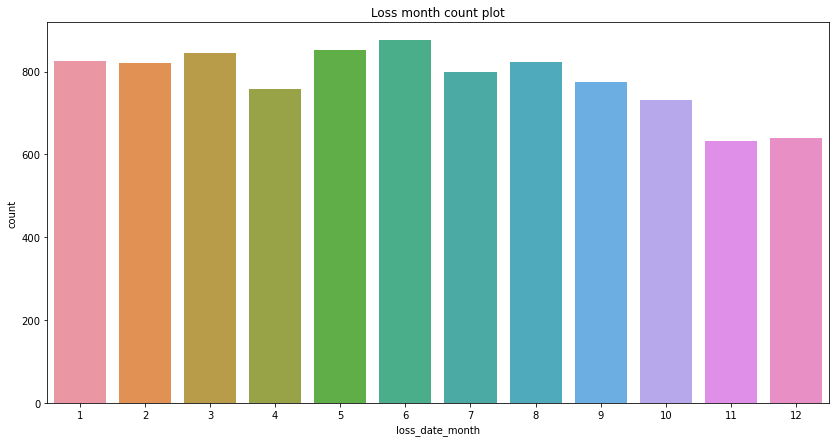

In [160]:
# Loss month countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'loss_date_month', data = train)
plt.title('Loss month count plot')
plt.show()

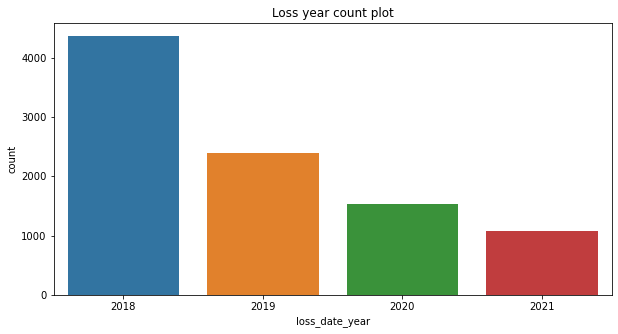

In [161]:
# Loss year countplot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'loss_date_year', data = train)
plt.title('Loss year count plot')
plt.show()

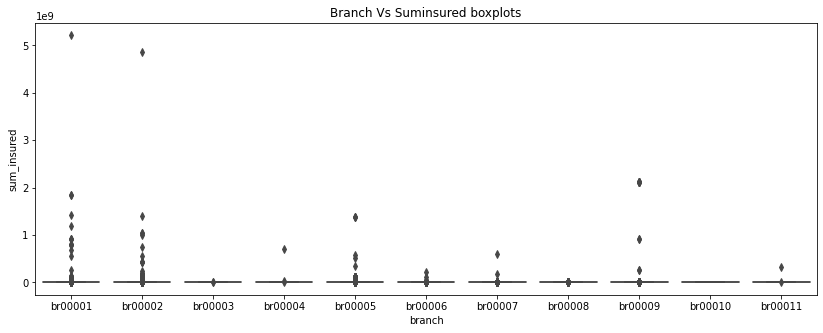

In [162]:
plt.figure(figsize = (14, 5))
sns.boxplot(x = 'branch', y = 'sum_insured', data = train)
plt.title('Branch Vs Suminsured boxplots')
plt.show()

In [163]:
# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])

# Preview engineered train dataset
train.head()


,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,loss_date_day,loss_date_month,loss_date_year
0,ID_JZ7QWRHH57RO,3070,7439,300000.0,26,4,30,5,2021-05-13,2,0,6,20,5,82150.00,13,5,2021
1,ID_KQ5TJMVLJ4EP,1126,3469,16000.0,4,7,9,31,2018-05-13,2,0,6,21,1,3780.24,13,5,2018
2,ID_NYHI7WJGGIAE,630,2799,3000.0,28,1,9,25,2018-08-18,2,0,6,22,1,2196.50,18,8,2018
3,ID_ROMMDCXYUXN5,2546,6448,6000.0,4,1,8,31,2018-12-20,2,0,6,19,0,105.67,20,12,2018
4,ID_2OTD9NX8L73D,1767,4832,26850.0,14,7,32,22,2018-11-07,0,0,6,19,0,1605.64,7,11,2018


In [164]:
test = pd.merge(policy,test)

In [165]:
test

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch,...,from_date_month,from_date_year,claim_id,claim_number,sum_insured,product,risk_type,loss_date,primary_cause,secondary_cause
0,pol000005813,prod00015,2017-07-03 09:46:34.260,2017-07-01,2017-11-01 00:00:00.000,ag00226,cob00034,ct0001,rf0001,br00002,...,7,2017,ID_83941J9WJ2II,claim0000913,66000.0,prod00015,rt00023,2018-02-20,pc0007,sc00029
1,pol000008192,prod00005,2017-07-11 18:22:26.430,2017-07-01,2017-10-31 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00001,...,7,2017,ID_QMBIEC5DUEP2,claim0008909,4000.0,prod00005,rt00032,2018-09-08,pc0007,sc00022
2,pol000008192,prod00005,2017-07-11 18:22:26.430,2017-07-01,2017-10-31 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00001,...,7,2017,ID_QMBIEC5DUEP2,claim0008909,4000.0,prod00005,rt00032,2018-09-08,pc0007,sc00022
3,pol000008164,prod00005,2017-07-18 11:44:22.570,2017-07-01,2017-10-31 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00001,...,7,2017,ID_JBZISFA0HA2L,claim0008924,18000.0,prod00005,rt00032,2018-01-27,pc0007,sc00023
4,pol000008164,prod00005,2017-12-14 16:39:19.690,2017-11-01,2018-02-28 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00001,...,11,2017,ID_JBZISFA0HA2L,claim0008924,18000.0,prod00005,rt00032,2018-01-27,pc0007,sc00023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,pol000006614,prod00005,2018-05-21 15:05:35.370,2018-05-15,2018-09-14 00:00:00.000,ag00037,cob00009,ct0003,rf0001,br00002,...,5,2018,ID_U1UA4DIGPNIL,claim0004941,5000.0,prod00005,rt00032,2018-02-07,pc0007,sc00029
356,pol000006033,prod00015,2018-05-29 08:41:01.620,2018-04-01,2019-03-31 00:00:00.000,ag00037,cob00034,ct0001,rf0002,br00002,...,4,2018,ID_4L1TKOQCSOXM,claim0003638,0.0,prod00015,rt00023,2020-11-23,pc0007,sc00024
357,pol000009176,prod00005,2018-06-08 15:06:18.553,2018-06-01,2019-05-31 00:00:00.000,ag00226,cob00009,ct0003,rf0002,br00001,...,6,2018,ID_H0J2ISA66QCA,claim0010197,7000.0,prod00005,rt00032,2018-09-08,pc0007,sc00023
358,pol000009176,prod00005,2018-06-08 15:06:18.553,2018-06-01,2019-05-31 00:00:00.000,ag00226,cob00009,ct0003,rf0002,br00001,...,6,2018,ID_H0J2ISA66QCA,claim0010197,7000.0,prod00005,rt00032,2018-09-08,pc0007,sc00023


Preproccessing test data

In [166]:
# Convert datetime variables to datetime objects
test.loss_date = pd.to_datetime(test.loss_date, errors='coerce')

# Fill in missing values in categorical variables with the most common
test[cat_cols] = test[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  test[col] = test[col].astype('category')

# Extract day, month and year from the loss date column
test['loss_date_day'] = test.loss_date.dt.day #day

test['loss_date_month'] = test.loss_date.dt.month #month
 
test['loss_date_year'] = test.loss_date.dt.year #year

# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  test[col] = le.fit_transform(test[col])

# Preview engineered test dataset
test.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch,...,claim_number,sum_insured,product,risk_type,loss_date,primary_cause,secondary_cause,loss_date_day,loss_date_month,loss_date_year
0,0,prod00015,2017-07-03 09:46:34.260,2017-07-01,2017-11-01 00:00:00.000,3,4,0,0,1,...,0,66000.0,1,0,2018-02-20,1,7,20,2,2018
1,39,prod00005,2017-07-11 18:22:26.430,2017-07-01,2017-10-31 00:00:00.000,3,0,1,0,0,...,226,4000.0,0,3,2018-09-08,1,3,8,9,2018
2,39,prod00005,2017-07-11 18:22:26.430,2017-07-01,2017-10-31 00:00:00.000,3,0,1,0,0,...,226,4000.0,0,3,2018-09-08,1,3,8,9,2018
3,36,prod00005,2017-07-18 11:44:22.570,2017-07-01,2017-10-31 00:00:00.000,3,0,1,0,0,...,227,18000.0,0,3,2018-01-27,1,4,27,1,2018
4,36,prod00005,2017-12-14 16:39:19.690,2017-11-01,2018-02-28 00:00:00.000,3,0,1,0,0,...,227,18000.0,0,3,2018-01-27,1,4,27,1,2018


In [167]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   policy_number      360 non-null    int32         
 1   product_code       360 non-null    object        
 2   trans_date         360 non-null    datetime64[ns]
 3   from_date          360 non-null    datetime64[ns]
 4   to_date            360 non-null    object        
 5   agent              360 non-null    int32         
 6   class_of_business  360 non-null    int32         
 7   client_type        360 non-null    int32         
 8   renewal_frequency  360 non-null    int32         
 9   branch             360 non-null    int32         
 10  trans_date_day     360 non-null    int64         
 11  trans_date_month   360 non-null    int64         
 12  trans_date_year    360 non-null    int64         
 13  from_date_day      360 non-null    int64         
 14  from_date_

Modelling 

In [171]:
# Select main columns to be used in training
main_cols = train.columns.difference(['claim_id', 'loss_date', 'target']).tolist()
X = train[main_cols]
y = train.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the MAE score of the model
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

LinearRegression MAE score on the X_test is: 58703.29737447273


In [169]:
X

,agent,branch,claim_number,class_of_business,client_type,loss_date_day,loss_date_month,loss_date_year,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause,sum_insured
0,4,5,7439,30,2,13,5,2021,3070,6,26,0,5,20,300000.0
1,7,1,3469,9,2,13,5,2018,1126,6,4,0,31,21,16000.0
2,1,1,2799,9,2,18,8,2018,630,6,28,0,25,22,3000.0
3,1,0,6448,8,2,20,12,2018,2546,6,4,0,31,19,6000.0
4,7,0,4832,32,0,7,11,2018,1767,6,14,0,22,19,26850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371,1,1,2513,32,0,2,9,2019,560,6,14,1,22,19,42000.0
9372,3,1,3338,8,2,12,5,2018,1007,6,4,1,31,19,6800.0
9373,3,0,5907,8,2,28,7,2018,2099,6,4,0,31,27,5000.0
9374,1,1,3452,8,2,16,8,2018,1109,6,4,0,31,20,6000.0


In [170]:
# Make prediction on the test set
test_df = test[main_cols]
predictions = model.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file.target)
plt.title('Predictions Data Distribution');

ValueError: Length of values (360) does not match length of index (4019)

In [ ]:
# Preview the sub_file
sub_file.head()

In [ ]:
# Write to csv file to submit to Zindi
sub_file.to_csv("Baseline.csv", index = False)